In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Configure the visual settings for seaborn
sns.set(style="whitegrid")

In [12]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/wine_data.csv')  # Replace with the path to your uploaded file

# Display the first few rows of the dataset
df.head()

# Display the shape of the dataset to understand its size
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 1599 rows and 12 columns.


In [13]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Show basic statistics for the dataset
print("Basic statistics of the dataset:")
print(df.describe())

Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Basic statistics of the dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     

In [14]:
# 1. Find the most frequently occurring wine quality
most_frequent_quality = df['quality'].mode()[0]
print(f"The most frequently occurring wine quality is: {most_frequent_quality}")

The most frequently occurring wine quality is: 5


In [15]:
# 2. Find the highest and lowest quality values
max_quality = df['quality'].max()
min_quality = df['quality'].min()
print(f"Highest wine quality: {max_quality}, Lowest wine quality: {min_quality}")

Highest wine quality: 8, Lowest wine quality: 3


In [16]:
# 3. Correlation between fixed acidity and wine quality
correlation_fixed_acidity = df['fixed acidity'].corr(df['quality'])
print(f"Correlation between fixed acidity and quality: {correlation_fixed_acidity:.2f}")

Correlation between fixed acidity and quality: 0.12


In [17]:
# 4.Correlation between alcohol content and wine quality
correlation_alcohol = df['alcohol'].corr(df['quality'])
print(f"Correlation between alcohol content and quality: {correlation_alcohol:.2f}")

Correlation between alcohol content and quality: 0.48


In [ ]:
# 5.Correlation between free sulfur dioxide and wine quality
correlation_free_sulfur_dioxide = df['free sulfur dioxide'].corr(df['quality'])
print(f"Correlation between free sulfur dioxide and quality: {correlation_free_sulfur_dioxide:.2f}")

In [18]:
# 6.Calculate average residual sugar for the best and lowest quality wines
best_quality_avg_sugar = df[df['quality'] == max_quality]['residual sugar'].mean()
lowest_quality_avg_sugar = df[df['quality'] == min_quality]['residual sugar'].mean()

print(f"Average residual sugar for best quality wine: {best_quality_avg_sugar:.2f} g/L")
print(f"Average residual sugar for lowest quality wine: {lowest_quality_avg_sugar:.2f} g/L")

Average residual sugar for best quality wine: 2.58 g/L
Average residual sugar for lowest quality wine: 2.64 g/L


In [19]:
#7. Correlation between volatile acidity and wine quality
correlation_volatile_acidity = df['volatile acidity'].corr(df['quality'])
print(f"Correlation between volatile acidity and quality: {correlation_volatile_acidity:.2f}")

Correlation between volatile acidity and quality: -0.39


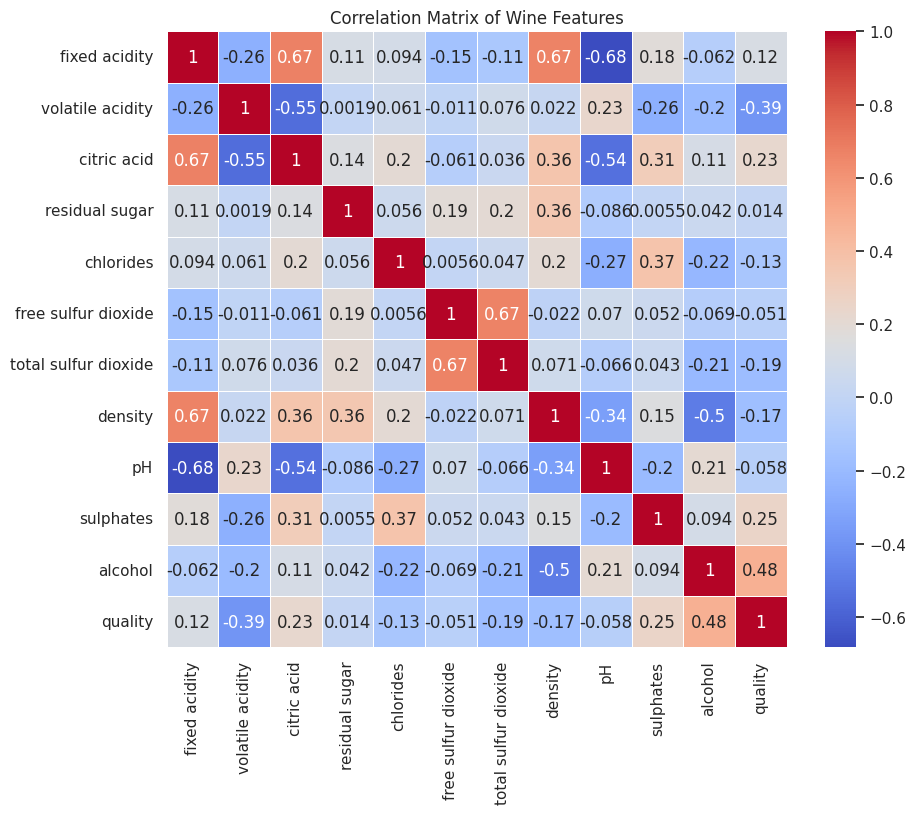

In [23]:
# Plot the correlation heatmap to visualize relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [25]:
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.57
Confusion Matrix for Decision Tree:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 127  57   2   0]
 [  0   5  49 120  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.58       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480



In [27]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.66
Confusion Matrix for Random Forest:
[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 149  44   2   0]
 [  0   0  45 140  15   0]
 [  0   0   0  31  29   1]
 [  0   0   0   1   4   1]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.76      0.74       195
           6       0.63      0.70      0.66       200
           7       0.58      0.48      0.52        61
           8       0.50      0.17      0.25         6

    accuracy                           0.66       480
   macro avg       0.41      0.35      0.36       480
weighted avg       0.64      0.66      0.65       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Model Accuracy: 0.57
Random Forest Model Accuracy: 0.66


<ipython-input-28-aa43bc5a58c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Decision Tree', 'Random Forest'], y=[dt_accuracy, rf_accuracy], palette='viridis')


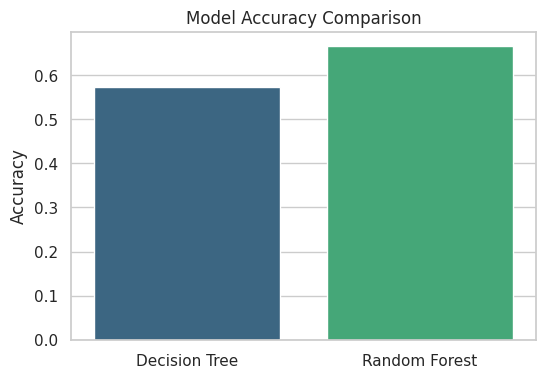

In [28]:
# Compare the accuracy of both models
print(f"Decision Tree Model Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

# Plot the accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[dt_accuracy, rf_accuracy], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()